In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')

## Lagrange interpolating polynomials

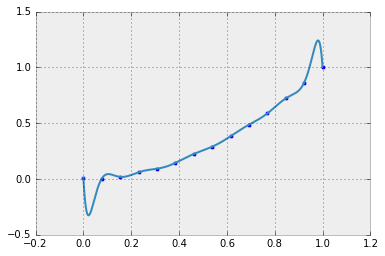

In [3]:
# Given N points (x_i, y_i), it is always possible to find a
# polynomial of degree N-1 which passes through all points 
# (provided x_i is different for all points). See for example
# https://en.wikipedia.org/wiki/Lagrange_polynomial
from scipy.interpolate import lagrange

# Number of points
N = 14
# N evenly spaced x-values
x = np.linspace(0, 1, N)
# x**2 + some Gaussian random noise (mu = 0, sigma = 0.01)
y = x**2 + np.random.normal(loc = 0, scale = 0.01, size = N)

# Find the polynomial that passes through all points
f = lagrange(x, y)

# Plot points and a smooth curve of the polynomial. The point
# is to illustrate that it is not necessarily a good idea
# to try to interpolate a large number of points.
plt.scatter(x, y)
plt.plot(np.linspace(0, 1, 1000), f(np.linspace(0, 1, 1000)))

## Midpoint rule

In [5]:
# Note that in python, it's perfectly ok to send a function
# as an argument to a function, no special declaration needed.
# In general, (almost) anything goes in python. This can be a bit
# dangerous, as it makes it easy to make mistakes.
# With great power comes great responsibility, etc.

def midpoint_rule(a, b, n, func):
    # The width of each rectangle
    step = (b - a) / n
    # Array with the midpoint of each rectangle
    X = np.linspace(a + step/2, b - step/2, n)
    # When func(x) is applied to an array, it returns an array 
    # of equal size, holding the result of applying the function
    # to each element of the original array. We take the sum 
    # of the resulting array, and multiply by step
    return sum(func(X))*step

In [6]:
def f(x):
    return x - x**3

print(midpoint_rule(0, 10, 1000, f))

-2449.99875


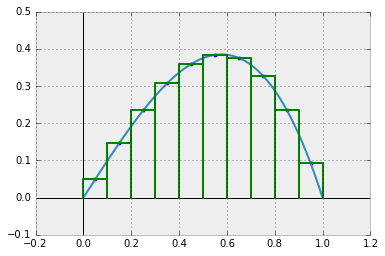

In [12]:
# Define a function to use as an example
def f(x):
    return x - x**3

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
a = 0
b = 1
X = np.linspace(a, b, 1000)
plt.plot(X, f(X))

# Draw axis through origin, for visualisation purposes
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

# Draw the rectangles used in the Riemann sum
# There are n rectangles
n  = 10
# Each has width step
step = (b - a)/n
# Create a vector of the midpoints of each rectangle
X  = np.linspace(a + step/2, b - step/2, n)
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-step/2, x-step/2, x+step/2, x+step/2], [0,f(x), f(x), 0], color = "g")

## Trapezoidal rule

In [13]:
def trapezoidal_rule(a, b, n, func):
    step = (b - a) / n
    X = np.linspace(a + step, b - step, n-1)
    return (func(a)/2 + sum(func(X)) + func(b)/2)*step

In [14]:
def f(x):
    return x - x**3

trapezoidal_rule(0, 10, 10, f)

-2475.0

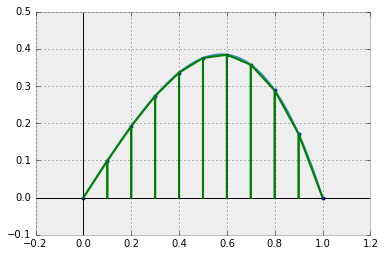

In [16]:
# Define a function to use as an example
def f(x):
    return x - x**3

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
a = 0
b = 1
X = np.linspace(a, b, 1000)
plt.plot(X, f(X))

# Draw axis through origin, for visualisation purposes
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

# Draw the rectangles used in the Riemann sum
# There are n rectangles
n  = 10
# Each has width step
step = (b - a)/n
# Create a vector of the abcissas, using 
# n+1 points for a closed rule
X  = np.linspace(a, b, n+1)
# Draw the abcissas as circles
plt.scatter(X, f(X))
# For each trapezoid, draw the borders using a line plot
# stopping at the next-to-last
for x in X[:-1]:
    plt.plot([x, x, x+step, x+step], [0, f(x), f(x+step), 0], color = "g")

## Simpson's rule

In [17]:
def simpsons_rule(a, b, n, func):
    # N must be even for Simpson's rule
    assert n%2 == 0
    step = (b - a) / n
    # All abcissas except endpoints, using
    # n+1 points for closed rule
    X = np.linspace(a + step, b - step, n-1)
    return (func(a) + 4*np.sum(func(X[0::2])) + 2*np.sum(func(X[1::2])) + func(b))*step/3

In [18]:
def f(x):
    return x - x**3

simpsons_rule(0, 10, 2, f)

-2450.0